# Modeling

## Workflow

EDA -> Dummy classifier -> Evaluate dummy model -> N model -> Compare and select models

**EDA**<br>
EDA things

**Dummy Classifier**<br>
Create a dummy classifier and run a dummy model

**Evaluate dummy model**<br>
Evaluate the dummy model using relavent evaluations.

**N model**<br>
If data engineering and exploration is required for the N model, you would do that now.<br>
Once data is set for your second model, you would run and evaluate that model.

The process repeats for each N model after the dummy model.

**Compare and select**<br>
At the end, you would evaluate and select between your models.

## Regularization

- To regularize data, they must be standard scaled first
- Regularize data to better fit model (fix under/over fit)
- Must use Test/Train split

**Ridge**

Start with this type of regularization.<br>
Gentler. More useful for smaller data sets.

**Lasso**

Rough regularization. Drops large coefficients. Useful for datasets with high volume of variables.

**Elastic Net**

Combination of Lasso and Ridge. % of each usually set standard by employer.

## Missing Vars

The `MissingIndicator` from `sklearn` will mark the missing values in an input array.

**Numeric Variables**

`SimpleImputer` can impute numeric or categorical vars as selected by `strategy=''`

**Categorical Variables**

`SimpleImputer` can be used for Categorical vars as designated by `strategy=''` or `fill_value=`

`

## Logistic Regression

Because LogReg regularizes data, you **must** scale data before performing a LogReg

### Dummy Model

Dummy model for Logistic Regression is called a classifier.

Use `dummy_model = DummyClassifier(strategy="most_frequent")` to instantiate the dummy model for a logistic regression.<br>
Fit to train.

### Measures of fit

**Accuracy**

$\frac{TP + TN}{TN + TP + FN + FP}$<br>
Cannot use with imbalanced data.

Balancing data will be covered later.

with scikit-learn, use `accuracy_score()`

**F1 (Equal)**

$\large 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$

Takes into account false negatives and false positives equally.

Higher percentage is better.

with scikit-learn, use `f1_score()`

<hr>

**Accuracy** vs **F1**

- Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial
- Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.
- In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

<hr>

**Precision**

$\frac{TP}{TP + FP}$

Captures False Positives. Useful for situations where false positives are considered more important.

with scikit-learn, use `precision_score()`

**Recall**

$\frac{TP}{TP + FN}$

Captures False Negatives. Useful for situations where false negatives are considered more important<br>
This is a **True Positive Rate**.

with scikit-learn, use `recall_score()`

**False Positive Rate (FPR)**

$\frac{FP}{FP + TN}$

Measures how many of the negative casses we incorrectly classified as positive.

**Log-loss**

Can be found using `log_loss(y_test, y_hat_hd)`<br>
Where `y_hat_hd` is your predicted y's from your X_test.

**AUC**

Model comparison metric<br>
Larger Area Under Curve (AUC) is better.

Can be found using `roc_auc_score(y_test, y_hat_hd)`

**ROC**

Receiver Operating Characteristic (ROC) Curve<br>
plots the true-positive rate (TPR) vs. the false-positive rate (FPR).

Can be plotted manually with:
```
# Extract the probability predictions for the "1" class (heart disease)
y_hat_hd = y_prob[:, 1]

# Get the FPR and TPR data
fpr, tpr, thresholds = roc_curve(y_test, y_hat_hd)

# Plot the FPR and TPR data
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot((0,1), (0,1), 'k--');
```

or using `plot_roc_curve(hd_model, X_test_sc, y_test);` <br>
Where `X_test_sc` is your scaled X values in your test set and `hd_model` is your logistic model.

### Confusion Matrix

Can be used to calculate **F1**, **Precision** and **Recall**.

$\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}$

After running models, you can use `confusion_matrix(y_test, y_pred)` to generate a matrix array and `plot_confusion_matrix(cred_model, X_test_sc, y_test);` to visualize the matrix.

Use this block to parse your confusion matrix into TN, TP, FN, FP. Where cm_1 is your confusion matrix array.
```
tn = cm_1[0, 0]
fp = cm_1[0, 1]
fn = cm_1[1, 0]
tp = cm_1[1, 1]
```
These can then be used to write into the measures of fit formulas above.

These can also be displayed using `classification_report(y_test, y_pred)`.

## Decision Trees

Classification model

Set stopping criteria with:<br>
- `max_depth`
- minimum sample size
- impurity decrease max
- leaf number
- max splits

left is true, right is false

determines feature importance

uses metrics of impurity<br>
entropy/gini - lower gini means less impurity

**Cons**
- Tends to overfit
- Struggles with imbalanced data
- Inferential not predictive
- Computationally heavy

## K - Nearest Neighbors

<u>**Min/Max Scale Data for K-NN models**</u>

$\uparrow$ K = High Bias, Low Variance

$\downarrow$ K = Low Bias, High Variance

## Model Tuning

Using GridSearch, we can determine which hyperparams to adjust.

# Naive Bayes

## Gaussian NB

Assuming:
- Vars are independant
- Vars are normally distributed

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [24]:
gnb = GaussianNB(priors=[1/3, 1/3, 1/3])

In [25]:
X = elephants.drop('species', axis=1)
y = elephants['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
gnb.fit(X_train, y_train)

GaussianNB(priors=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])

In [26]:
gnb.predict_proba(np.array([263, 7009]).reshape(1, -1))

array([[0.00425713, 0.04799459, 0.94774828]])

In [27]:
gnb.score(X_test, y_test)

0.8947368421052632

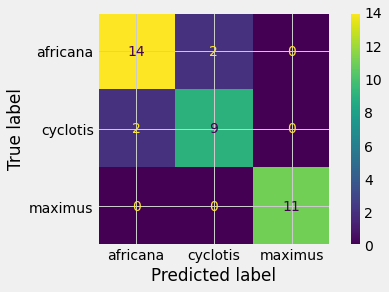

In [28]:
plot_confusion_matrix(gnb, X_test, y_test);